Paso 1: Importando los datos y quitando alertas

In [32]:
#Librerias
import os 
import pandas as pd 
import numpy as np 
import warnings
#-------------

warnings.filterwarnings("ignore")
os.chdir("C:\\Users\\wichi\\OneDrive\\Documentos\\EBAC\\Data Science\\Actividades\\Activity KMedias")
DS_iris = pd.read_csv("iris.csv")
DS_iris.head()
# Convertimos los variablesbvnvfddnnnxc vgrdfb categoricos en numericos
species_num = []
for i in range(len(DS_iris)):
    if DS_iris.iloc[i]['variety'] == 'Setosa':
        species_num.append(0)
    elif DS_iris.iloc[i]['variety'] == 'Versicolor':
        species_num.append(1)
    elif DS_iris.iloc[i]['variety'] == 'Virginica':
        species_num.append(2)
DS_iris["variety_num"] = species_num
DS_iris

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_num
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


In [8]:
species_num.sort()

Paso 2: Tomar las columnas numericas

In [9]:
#Separamos las variables numericas, con estas se construiran los clusters 
num_fiels = DS_iris.iloc[:,0:4].values
num_fiels

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Paso 3: Calcular la Suma de Cuadrados Dentro de los Clusters (WCSS) con esto podemos determinar cuantos clusters son optimos para el data set

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
#Creamos una lista que guarde la suma de cuadrados de los clusters que van desde un cluster hasta 10 clusters.
wcss = []
for index in range(1,11):
    kmeans = KMeans(n_clusters = index, init="k-means++", random_state = 42)
    kmeans.fit(num_fiels)
    wcss.append(kmeans.inertia_)

print("Suma de los cuadrados dentro de 10 clusters")
wcss

Suma de los cuadrados dentro de 10 clusters


[681.3706,
 152.3479517603579,
 78.85144142614601,
 57.22847321428571,
 46.44618205128205,
 39.03998724608725,
 34.469495898838005,
 30.186555194805198,
 28.28937085137085,
 26.552373141564317]

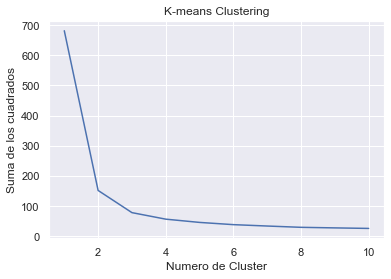

In [11]:
#Graficamos los resultados metodo Elbow. Ayuda a determinar cuantos clusters son los ideale, el criterio es matener el
#equilibrio entre el numero de clusters y el menor error cuadratico
sns.set()
plt.plot(range(1,11), wcss)
plt.title("K-means Clustering")
plt.xlabel("Numero de Cluster")
plt.ylabel("Suma de los cuadrados")
plt.show()

Como podemos observar el grafico nos indica que entre 3 y 4 clusters es optimo para no perder informacion sobre los datos

Paso 4: Calcular las K-means con un cluster de 4, y colocamos una opcion de semillas aleatorias = 42 con el objetivo de que siempre tengamos los mismos centraloides en cada ejecucion

In [12]:
#Guardamos en la variable kmeans un objeto que contenga el resultado del algoritmo KMeans
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42) #Se detrminan los Centroides
cluster_values = kmeans.fit_predict(num_fiels) #Con los datos del data set segmentamos los datos de acuerdo a los Centroides
cluster_values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [91]:
#Cordenadas de los centroides
kmeans.cluster_centers_  #Tenemos 4 columnas y

array([[7.475     , 3.125     , 6.3       , 2.05      ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ]])

In [13]:
df_kmeans = pd.DataFrame(data= kmeans.cluster_centers_, index = ["C1","C2", "C3", "C4", "C5"], columns = ["sepal.length","sepal.width","petal.length","petal.width"])
df_kmeans

,sepal.length,sepal.width,petal.length,petal.width
C1,7.475000,3.125000,6.300000,2.050000
C2,5.006000,3.428000,1.462000,0.246000
C3,5.508000,2.600000,3.908000,1.204000
C4,6.207692,2.853846,4.746154,1.564103
C5,6.529167,3.058333,5.508333,2.162500


Paso 5: Graficamos los resultados primero sobre Sepal

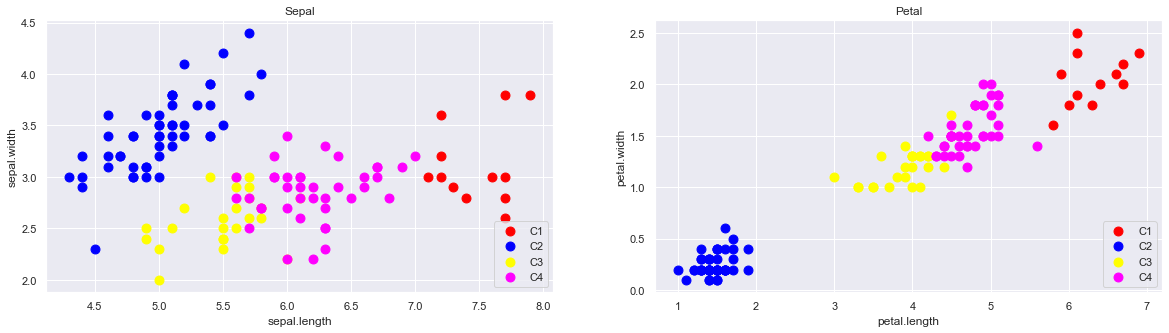

In [14]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].set_title("Sepal")
ax[0].scatter(x=num_fiels[cluster_values==0,0], y=num_fiels[cluster_values==0,1], c="red", cmap ="gist_rainbow", s=80, label ="C1")
ax[0].scatter(x=num_fiels[cluster_values==1,0], y=num_fiels[cluster_values==1,1], c="blue", cmap ="gist_rainbow", s=80, label ="C2")
ax[0].scatter(x=num_fiels[cluster_values==2,0], y=num_fiels[cluster_values==2,1], c="yellow", cmap ="gist_rainbow", s=80, label ="C3")
ax[0].scatter(x=num_fiels[cluster_values==3,0], y=num_fiels[cluster_values==3,1], c="magenta", cmap ="gist_rainbow", s=80, label ="C4")
ax[0].set_xlabel("sepal.length")
ax[0].set_ylabel("sepal.width")
ax[1].set_title("Petal")
ax[1].scatter(x=num_fiels[cluster_values==0,2], y=num_fiels[cluster_values==0,3], c="red", cmap ="gist_rainbow", s=80, label ="C1")
ax[1].scatter(x=num_fiels[cluster_values==1,2], y=num_fiels[cluster_values==1,3], c="blue", cmap ="gist_rainbow", s=80, label ="C2")
ax[1].scatter(x=num_fiels[cluster_values==2,2], y=num_fiels[cluster_values==2,3], c="yellow", cmap ="gist_rainbow", s=80, label ="C3")
ax[1].scatter(x=num_fiels[cluster_values==3,2], y=num_fiels[cluster_values==3,3], c="magenta", cmap ="gist_rainbow", s=80, label ="C4")
ax[1].set_xlabel("petal.length")
ax[1].set_ylabel("petal.width")
ax[0].legend(loc="lower right")
ax[1].legend(loc="lower right")

Como podemos ver agrupar los datos en 5 clusters no permite tener una agrupación clara, por lo que ahora repetiremos los pasos pero ahora con 3 clusters.

In [33]:
#Preparamos nuevamente el algoritmo pero con tres Centroides
kmeans3 = KMeans(n_clusters = 3, init = "k-means++", random_state=42)
cluster_values3 = kmeans3.fit_predict(num_fiels)
cluster_values3.sort()

In [16]:
df_kmeans_3 = pd.DataFrame(data= kmeans3.cluster_centers_, index = ["C1","C2", "C3"], columns = ["sepal.length","sepal.width","petal.length","petal.width"])
df_kmeans_3

,sepal.length,sepal.width,petal.length,petal.width
C1,5.901613,2.748387,4.393548,1.433871
C2,5.006000,3.428000,1.462000,0.246000
C3,6.850000,3.073684,5.742105,2.071053


Text(0, 0.5, 'petal.width')

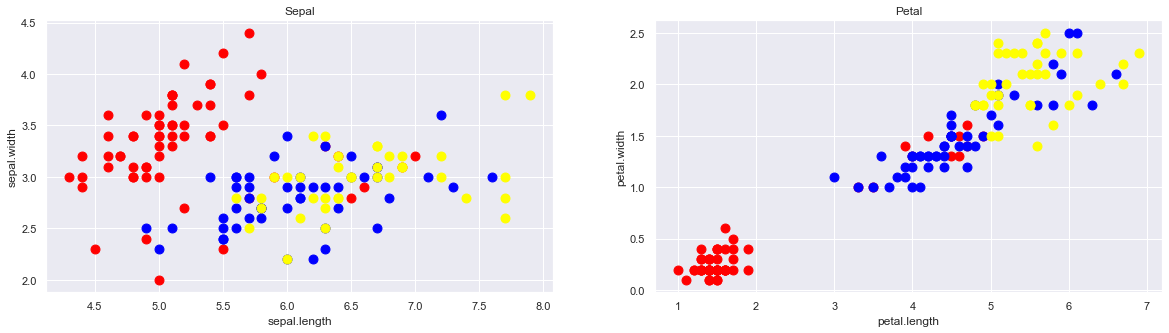

In [17]:
fig, ax = plt.subplots(1,2, figsize = (20,5))
ax[0].set_title("Sepal")
ax[0].scatter(x=num_fiels[cluster_values3==0,0], y=num_fiels[cluster_values3==0,1], c="red", cmap ="gist_rainbow", s=80, label ="C1")
ax[0].scatter(x=num_fiels[cluster_values3==1,0],y=num_fiels[cluster_values3==1,1],c="blue",cmap = "gist_rainbow", s= 80, label="C2")
ax[0].scatter(x=num_fiels[cluster_values3==2,0],y=num_fiels[cluster_values3==2,1],c="yellow", cmap="gist_rainbow", s= 80, label="C3")
ax[0].set_xlabel("sepal.length")
ax[0].set_ylabel("sepal.width")
ax[1].set_title("Petal")
ax[1].scatter(x=num_fiels[cluster_values3==0,2], y=num_fiels[cluster_values3==0,3], c="red", cmap ="gist_rainbow", s=80, label ="C1")
ax[1].scatter(x=num_fiels[cluster_values3==1,2],y=num_fiels[cluster_values3==1,3],c="blue",cmap = "gist_rainbow", s= 80, label="C2")
ax[1].scatter(x=num_fiels[cluster_values3==2,2],y=num_fiels[cluster_values3==2,3],c="yellow", cmap="gist_rainbow", s= 80, label="C3")
ax[1].set_xlabel("petal.length")
ax[1].set_ylabel("petal.width")

Paso 5: Comparemos los resultados
Dado que el dataset ya trae las especies, podemos comparar los clusters que se construyeron a traves del algoritmo y la agrupacion que trae el data set.

Text(0, 0.5, 'sepal.width')

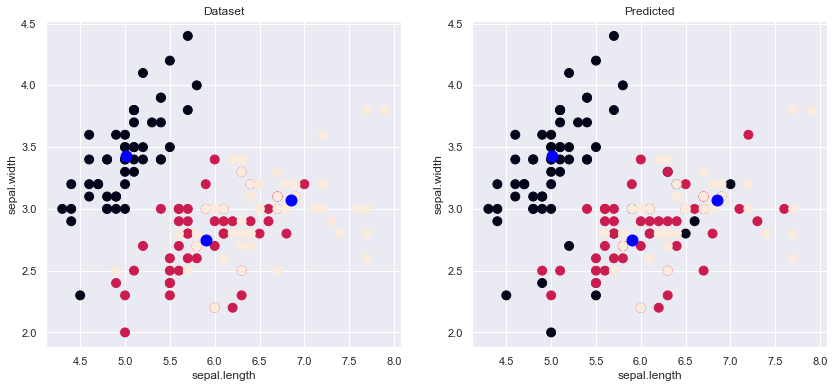

In [18]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].set_title("Dataset")
ax[0].scatter(x = DS_iris["sepal.length"], y=DS_iris["sepal.width"], c=species_num, s = 80)
ax[0].scatter(x =kmeans3.cluster_centers_[:,0], y= kmeans3.cluster_centers_[:,1], c= "blue", s=120)
ax[0].set_xlabel("sepal.length")
ax[0].set_ylabel("sepal.width")
ax[1].set_title("Predicted")
ax[1].scatter(x = DS_iris["sepal.length"], y=DS_iris["sepal.width"], c=cluster_values3, s = 80 )
ax[1].scatter(x =kmeans3.cluster_centers_[:,0], y= kmeans3.cluster_centers_[:,1], c= "blue", s=120)
ax[1].set_xlabel("sepal.length")
ax[1].set_ylabel("sepal.width")

Como podemos observar graficamente el algoritmo kmeans si realizo los clusters correctamente a exepcion de algunos, los cuales pueden ser outliers.

Como complemento podemos obtener el % de acertividad

In [26]:
DS_iris.sort_values(by = "variety_num")
species_num.sort()

In [36]:
DS_iris["predicted"] = cluster_values3
DS_iris

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_num,predicted
0,5.1,3.5,1.4,0.2,Setosa,0,0
1,4.9,3.0,1.4,0.2,Setosa,0,0
2,4.7,3.2,1.3,0.2,Setosa,0,0
3,4.6,3.1,1.5,0.2,Setosa,0,0
4,5.0,3.6,1.4,0.2,Setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2,2
146,6.3,2.5,5.0,1.9,Virginica,2,2
147,6.5,3.0,5.2,2.0,Virginica,2,2
148,6.2,3.4,5.4,2.3,Virginica,2,2


In [151]:
validation = []
for i in range(len(DS_iris)):
    if DS_iris.iloc[i]["predicted"] == DS_iris.iloc[i]["variety_num"]:
        validation.append(1)
    else: 
        validation.append(0)
DS_iris["validation"]=validation
sum_validation = DS_iris["validation"].sum()

print("El algoritmo tuvo una acertividad del: ", ((sum_validation/len(DS_iris))*100),"%")
print(sum_validation)

El algoritmo tuvo una acertividad del:  84.0 %
126


El algoritmo KMeans si bien tuvo una acertividad del 84% aun podemos averiguar si atraves de la reduccion de las dimensionalidades podemos obtener mejores resultado.

# Aplicando PCA para obtener más acertividad en KMeans

In [48]:
#Aprendizaje automatico, preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from numpy import linalg as LA


In [49]:
#Determinar el numero de observaciones del Dataset
index = DS_iris.index 
observaciones = len(index)
observaciones

150

In [51]:
#Separamos las variables númericas de las categoricas
DS_iris2 = DS_iris.iloc[:,0:4].values
DS_iris2

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [53]:
#Estandarizamos las variables, media 0 y desviacion estandar de 1
DS_iris2st = StandardScaler().fit_transform(DS_iris2)
DS_iris2st

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [54]:
#Calculo de la matriz de correlaciones para la matriz tranformada
A = (1/observaciones)* np.dot(DS_iris2st.T, DS_iris2st)
A

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [55]:
# EntRenamiento del modelo PCA con escalado de los datos

pca_pipe = make_pipeline(StandardScaler(),PCA())
pca_pipe.fit(DS_iris2)

#Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps["pca"]

print("Eigenvalores: ")
results = LA.eigvals(A)
print(results)

Eigenvalores: 
[2.91849782 0.91403047 0.14675688 0.02071484]


In [56]:
# Porcentaje de la varianza explicada por cada nuevo componente
print("Porcentaje de varianza explicada por componente")
print(modelo_pca.explained_variance_ratio_)

Porcentaje de varianza explicada por componente
[0.72962445 0.22850762 0.03668922 0.00517871]


In [59]:
#Calculo de los eigenvectores
print("Eigenvectores (por renglòn):")
pd.DataFrame(data = modelo_pca.components_, columns = ["sepal.length","sepal.width","petal.length","petal.width"],
            index = ["PC1","PC2","PC3","PC4"] )

Eigenvectores (por renglòn):


,sepal.length,sepal.width,petal.length,petal.width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


In [62]:
# Proyecciones de los componentes
proyecciones = np.dot(modelo_pca.components_,DS_iris2.T)
proyecciones = pd.DataFrame(proyecciones, index = ["PC1","PC2","PC3","PC4"] )
proyecciones = proyecciones.transpose().set_index(DS_iris.index)
proyecciones

,PC1,PC2,PC3,PC4
0,2.640270,5.204041,-2.488621,0.117033
1,2.670730,4.666910,-2.466898,0.107536
2,2.454606,4.773636,-2.288321,0.104350
3,2.545517,4.648463,-2.212378,0.278417
4,2.561228,5.258629,-2.392226,0.155513
...,...,...,...,...
145,7.000417,5.579908,-1.890065,1.583173
146,6.584640,4.935618,-2.006564,1.675082
147,6.726747,5.484342,-1.936433,1.792510
148,6.748228,5.765416,-1.404104,1.923510


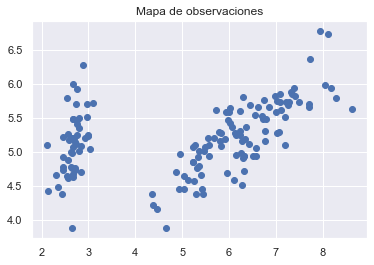

In [66]:
x = proyecciones.iloc[:,0]
y = proyecciones.iloc[:,1]

x = x.to_numpy()
y = y.to_numpy()

fig, ax = plt.subplots()
ax.set_title ("Mapa de observaciones")
ax.scatter(x,y)



In [86]:
DS_Components= proyecciones.iloc[:,0:2]

In [138]:
#Guardamos en la variable kmeans un objeto que contenga el resultado del algoritmo KMeans
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42) #Se detrminan los Centroides
cluster_values_PCA = kmeans.fit_predict(DS_Components) #Con los datos del data set segmentamos los datos de acuerdo a los Centroides
cluster_values_PCA

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [139]:
df_kmeans = pd.DataFrame(data= kmeans.cluster_centers_, index = ["C1","C2", "C3"], columns = ["PC1","PC2"])
df_kmeans

,PC1,PC2
C1,7.238395,5.725441
C2,2.672652,5.106685
C3,5.698331,4.954480


Text(0.5, 0, 'PC1')

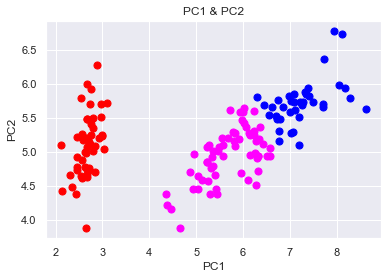

In [140]:
fig, ax = plt.subplots()
ax.set_title("PC1 & PC2")
ax.scatter(x=DS_Components[cluster_values_PCA==0]["PC1"],y=DS_Components[cluster_values_PCA==0]["PC2"], c= "blue", s=50, label = "C1")
ax.scatter(x=DS_Components[cluster_values_PCA==1]["PC1"],y=DS_Components[cluster_values_PCA==1]["PC2"], c= "red", s=50, label = "C2")
ax.scatter(x=DS_Components[cluster_values_PCA==2]["PC1"],y=DS_Components[cluster_values_PCA==2]["PC2"], c= "magenta", s=50, label = "C2")
ax.set_ylabel("PC2")
ax.set_xlabel("PC1")




In [ ]:
Como podemos ver en la graficacion de los cluster obtenidos por dos componentes principales.

In [143]:
cluster_values_PCA.sort()

In [147]:
DS_iris["PCA_predict"]= cluster_values_PCA
DS_iris

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_num,predicted,validation,PCA_predict,validation_PCA
0,5.1,3.5,1.4,0.2,Setosa,0,0,1,0,1
1,4.9,3.0,1.4,0.2,Setosa,0,0,1,0,1
2,4.7,3.2,1.3,0.2,Setosa,0,0,1,0,1
3,4.6,3.1,1.5,0.2,Setosa,0,0,1,0,1
4,5.0,3.6,1.4,0.2,Setosa,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2,2,1,2,1
146,6.3,2.5,5.0,1.9,Virginica,2,2,1,2,1
147,6.5,3.0,5.2,2.0,Virginica,2,2,1,2,1
148,6.2,3.4,5.4,2.3,Virginica,2,2,1,2,1


In [150]:
validation_PCA = []
for i in range(len(DS_iris)):
    if DS_iris.iloc[i]["PCA_predict"] == DS_iris.iloc[i]["variety_num"]:
        validation_PCA.append(1)
    else: 
        validation_PCA.append(0)
DS_iris["validation_PCA"]=validation_PCA
sum_validation_PCA = DS_iris["validation_PCA"].sum()

print("El algoritmo tuvo una acertividad del: ", ((sum_validation_PCA/len(DS_iris))*100),"%")
print(sum_validation_PCA)

El algoritmo tuvo una acertividad del:  84.0 %
126


# Conclusiòn

Para ambos casos la asertividad  es del 84% por lo que el algoritmo kmeans hace los cluster de igual manera si le damos dos dimensiones del dataset que dos componentes principale.